# Entrenamiento fold 2

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

Se optó por construir los folds previamente utilizando Weka utilzando un filtro que nos garantiza que estos fueron construidos con un proceso de muestreo samplificado

In [2]:
# Abrimos los .csv del fold

# Fold 2
training_set_2 = pd.read_csv("./fold_2/train.csv")
test_set_2 = pd.read_csv("./fold_2/test.csv")

In [4]:
# Variables en común usadas en todos los entrenamientos

# Número de instancias por pliegue. Todos los folds tienen un número igual
# de instancias positivas y negativas.
attributes = training_set_2.columns[:-1]
class_attribute = training_set_2.columns[-1]
class_attribute_name = training_set_2[training_set_2.columns[-1]].drop_duplicates()

positive_count, negative_count = training_set_2.groupby([class_attribute])[class_attribute].count()


print(attributes)
print(class_attribute)
print(class_attribute_name)
print(positive_count)

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')
class
0    tested_negative
2    tested_positive
Name: class, dtype: object
533


## Entrenamiento con fold 1

### Exploración de número de neuronas

In [12]:
from sklearn.neural_network import MLPClassifier

last_expermient_no = 0 # Número del último experimento conducido
init_neurons = (len(attributes)+len(class_attribute_name)) // 2
hidden_layer_sizes = (init_neurons) # Número de neuronas/capas
epochs = 1
learning_rate = 0
momentum = 0


results = []

for neurons_count in range(init_neurons, (init_neurons*2) + 1, 1):
    print(f"================{neurons_count} neurons===================")
    hidden_layer_sizes = (neurons_count) 
    clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=hidden_layer_sizes,
                    random_state=98041)


    #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
    train_attribute_values = training_set_2[attributes]
    train_class_values = training_set_2[class_attribute]

    test_attribute_values = test_set_2[attributes]
    test_class_values = test_set_2[class_attribute]

    ################## Modelo ###########################
    model = clasificador.fit(train_attribute_values, train_class_values)
    ################## Clasificar  #################
    predict = model.predict(test_attribute_values)
    ############ Evaluar ###############################
    report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
    report = classification_report(test_class_values, predict, labels=class_attribute_name)
    # record training set accuracy and error
    training_accuracy = (clasificador.score(train_attribute_values, train_class_values))
    training_error = (1.0 - clasificador.score(train_attribute_values, train_class_values))
    # record generalization accuracy and error
    test_accuracy = (clasificador.score(test_attribute_values, test_class_values))
    test_error = (1.0 - clasificador.score(test_attribute_values, test_class_values))
    #print(report)
    print(f"acc={report_dict['accuracy']}")
    print(f"training_accuracy = {training_accuracy}")
    print(f"test_accuracy = {test_accuracy}")
    #last_expermient_no += 1
    #results.append([])


# Escribir los resultados a un .csv para llevar record de los expermientos
#experiments_fold_1 = pd.read_csv('experiments_fold_1.csv')
#for result in results:
#    experiments_fold_1.loc[len(experiments_fold_1)] = result
#experiments_fold_1.to_csv('experiments_fold_1.csv', index=False)


================5 neurons===================
acc=0.6435272045028143
training_accuracy = 0.6607310215557638
test_accuracy = 0.6435272045028143
================6 neurons===================
acc=0.5290806754221389
training_accuracy = 0.5304592314901593
test_accuracy = 0.5290806754221389
================7 neurons===================
acc=0.7035647279549718
training_accuracy = 0.7029053420805998
test_accuracy = 0.7035647279549718
================8 neurons===================
acc=0.7091932457786116
training_accuracy = 0.7357075913776945
test_accuracy = 0.7091932457786116
================9 neurons===================
acc=0.7073170731707317
training_accuracy = 0.7160262417994376
test_accuracy = 0.7073170731707317
================10 neurons===================
acc=0.7467166979362101
training_accuracy = 0.7647610121836926
test_accuracy = 0.7467166979362101


Al hacer esta prueba, a diferencia del entrenamiento con el fold 1, la ventaje de la topología con 8 neuronas no era tan evidente, ya que la topología con 10 neuronas presenta un accuracy superior y la diferencia entre los accuracies podría entrar dentro de un rango aceptable, por lo que en el siguiente experimento también voy a probar topologías con 10 neuronas para ver si vale la pena el costo cómputo extra.

### Experimentación número de capas ocultas

In [6]:
last_expermient_no = 0 # Número del último experimento conducido
epochs = 1
learning_rate = 0
momentum = 0

results = []

hidden_layer_sizes = []

for n in (8, 10):
    hidden_layer_sizes = []
    for _ in range(1, 6, 1):
        hidden_layer_sizes.append(n)
        print(f"================layers = {hidden_layer_sizes}===================")
        clasificador = MLPClassifier(solver='lbfgs', 
                        hidden_layer_sizes=hidden_layer_sizes,
                        random_state=98041)


        #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
        train_attribute_values = training_set_2[attributes]
        train_class_values = training_set_2[class_attribute]

        test_attribute_values = test_set_2[attributes]
        test_class_values = test_set_2[class_attribute]

        ################## Modelo ###########################
        model = clasificador.fit(train_attribute_values, train_class_values)
        ################## Clasificar  #################
        predict = model.predict(test_attribute_values)
        ############ Evaluar ###############################
        report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
        report = classification_report(test_class_values, predict, labels=class_attribute_name)
        # record training set accuracy and error
        training_accuracy = (clasificador.score(train_attribute_values, train_class_values))
        training_error = (1.0 - clasificador.score(train_attribute_values, train_class_values))
        # record generalization accuracy and error
        test_accuracy = (clasificador.score(test_attribute_values, test_class_values))
        test_error = (1.0 - clasificador.score(test_attribute_values, test_class_values))
        #print(report)
        print(f"acc={report_dict['accuracy']}")
        print(f"training_accuracy = {training_accuracy}")
        print(f"test_accuracy = {test_accuracy}")


================layers = [8]===================
acc=0.7091932457786116
training_accuracy = 0.7357075913776945
test_accuracy = 0.7091932457786116
================layers = [8, 8]===================
acc=0.6228893058161351
training_accuracy = 0.6410496719775071
test_accuracy = 0.6228893058161351
================layers = [8, 8, 8]===================
acc=0.7786116322701688
training_accuracy = 0.7975632614807873
test_accuracy = 0.7786116322701688
================layers = [8, 8, 8, 8]===================
acc=0.7560975609756098
training_accuracy = 0.7938144329896907
test_accuracy = 0.7560975609756098
================layers = [8, 8, 8, 8, 8]===================
acc=0.7129455909943715
training_accuracy = 0.7403936269915652
test_accuracy = 0.7129455909943715
================layers = [10]===================
acc=0.7467166979362101
training_accuracy = 0.7647610121836926
test_accuracy = 0.7467166979362101
================layers = [10, 10]===================
acc=0.5178236397748592
training_accuracy = 0.5

No es claro aquí cuál es el número óptimo de capaz ocultas. Por un lado, con una sola capa de 10 neuronas se obtiene la mejor relación entre el acc sobre el test y sobre el training pero por el otro quizás una sola neurona no nos de tanta expresividad como topologías con más capas.

Para descartar dudas a través de experimentación, tomaré las mejores topologías con 8 y 10 neuronas y experimentaré con ellas.

### Experimentación número de épocas

################## layers = [8, 8, 8] ########################
---------------------- epochs = 100 -----------------------
New best acc: 0.7731958762886598 with 100 epochs
acc=0.7335834896810507
---------------------- epochs = 110 -----------------------
New best acc: 0.7778819119025304 with 110 epochs
acc=0.7410881801125704
---------------------- epochs = 120 -----------------------
New best acc: 0.7797563261480788 with 120 epochs
acc=0.7373358348968105
---------------------- epochs = 130 -----------------------
New best acc: 0.7806935332708529 with 130 epochs
acc=0.7410881801125704
---------------------- epochs = 140 -----------------------
New best acc: 0.7891283973758201 with 140 epochs
acc=0.7711069418386491
---------------------- epochs = 150 -----------------------
New best acc: 0.7835051546391752 with 150 epochs
acc=0.7692307692307693
---------------------- epochs = 160 -----------------------
New best acc: 0.7919400187441424 with 160 epochs
acc=0.7711069418386491
-------------

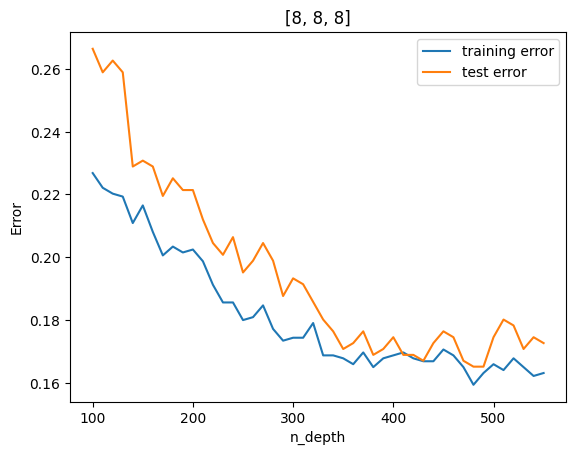

In [9]:
import matplotlib.pyplot as plt

last_expermient_no = 0 # Número del último experimento conducido
learning_rate = 0
momentum = 0

results = []

# se probaron estas topologías inicialmente: [8,8,8], [10, 10, 10, 10]
topologies = [[8,8,8]] 
epochs = range(100, 551, 10) # La granulaidad fue cambiando conforme la experimentación

for topology in topologies:
    print(f"################## layers = {topology} ########################")
    
    training_accuracy = []
    test_accuracy = []
    training_error = []
    test_error = []
    
    for epoch in epochs:
        print(f"---------------------- epochs = {epoch} -----------------------")
        best_acc = -1
        clasificador = MLPClassifier(solver='lbfgs', 
                        hidden_layer_sizes=topology,
                        max_iter = epoch,
                        random_state=98041)


        #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
        train_attribute_values = training_set_2[attributes]
        train_class_values = training_set_2[class_attribute]

        test_attribute_values = test_set_2[attributes]
        test_class_values = test_set_2[class_attribute]

        ################## Modelo ###########################
        model = clasificador.fit(train_attribute_values, train_class_values)
        ################## Clasificar  #################
        predict = model.predict(test_attribute_values)
        ############ Evaluar ###############################
        report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
        report = classification_report(test_class_values, predict, labels=class_attribute_name)

        training_accuracy.append(clasificador.score(train_attribute_values, train_class_values))
        training_error.append(1.0 - clasificador.score(train_attribute_values, train_class_values))

        if training_accuracy[-1] > best_acc:
            print(f"New best acc: {training_accuracy[-1]} with {epoch} epochs")
            best_acc = training_accuracy[-1]

        test_accuracy.append(clasificador.score(test_attribute_values, test_class_values))
        test_error.append(1.0 - clasificador.score(test_attribute_values, test_class_values))
        print(f"acc={report_dict['accuracy']}")

    plt.figure()
    plt.title(str(topology))
    plt.plot(epochs, training_error, label="training error")
    plt.plot(epochs, test_error, label="test error")
    plt.ylabel("Error")
    plt.xlabel("n_depth")
    plt.legend()

Experimentos: 
1. range(10, 351, 5)
2. range(100, 551, 10)


A partir de esta serie de experimentos y graficas, llego a este análisis:
1. La topología [8, 8, 8] presenta un buen balance lo compacta que es y su accuracy, que en el mejor punto antes del overfitting es de ~0.7467
2. La topología [10, 10, 10, 10] queda descartada porqque su accuracy antes de que comience el overfitting no es mejor que el de ninguna de las otras topologías.

Por lo tanto, al igual que en el pliegue 1, usaré la topología [8, 8, 8], tomando como el número de épocas ideal las 350 épocas que se aprecian en la gráfica antes del overfitting.


### Experimentos variando learning rate y momentum

NOTA: MLPClassifier ignora los parámetros de learning rate y momentum
cuando se usa el solver lbfgs. Cambié momentariamente a sgd para probar si de esta
forma mejoraba el performance con sgd, pero como se puede observar, no fue el caso.

================LR: 0.1 mom=0.3=======================
New best acc: 0.521087160262418 with 10 epochs
New best acc: 0.555763823805061 with 15 epochs
New best acc: 0.563261480787254 with 20 epochs
New best acc: 0.5660731021555764 with 25 epochs
New best acc: 0.5763823805060918 with 35 epochs
New best acc: 0.5866916588566073 with 40 epochs
New best acc: 0.5913776944704779 with 60 epochs
================LR: 0.1 mom=0.6=======================
New best acc: 0.49953139643861294 with 10 epochs
New best acc: 0.5623242736644799 with 15 epochs
New best acc: 0.563261480787254 with 20 epochs
New best acc: 0.5660731021555764 with 25 epochs
New best acc: 0.5782567947516402 with 40 epochs
New best acc: 0.584817244611059 with 45 epochs
================LR: 0.1 mom=0.9=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.3 mom=0.3=======================
New best acc: 0.49953139643861294 with 10 epochs
================LR: 0.3 mom=0.6=======================
New best

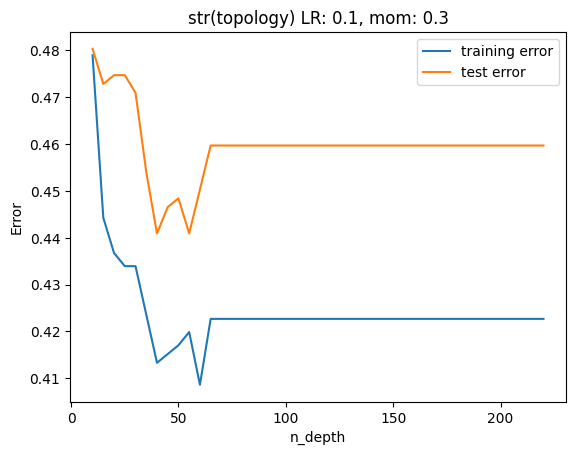

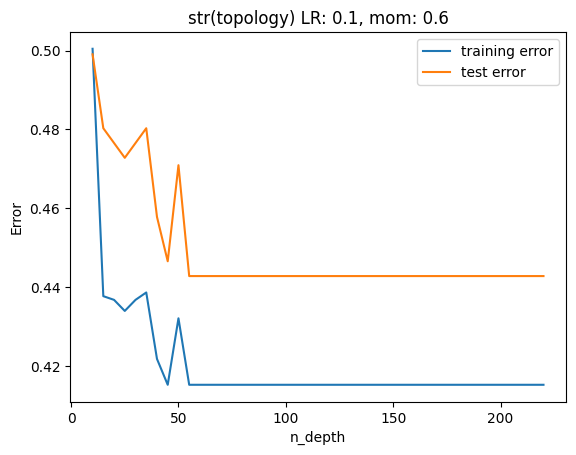

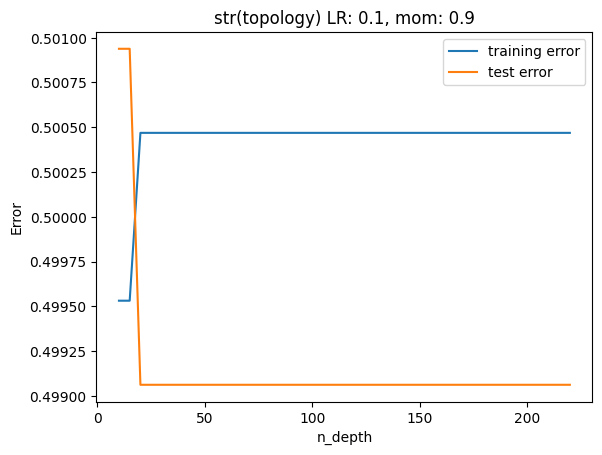

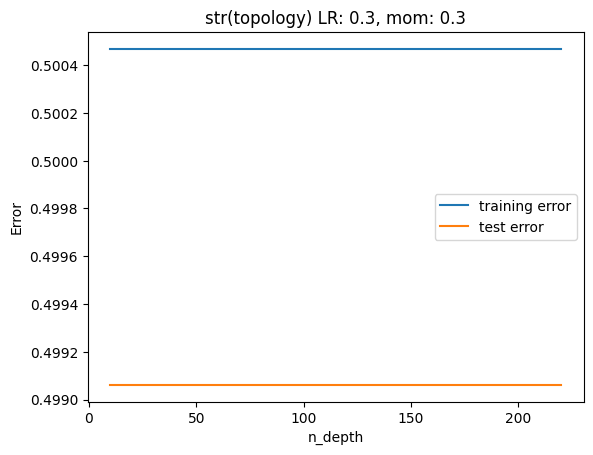

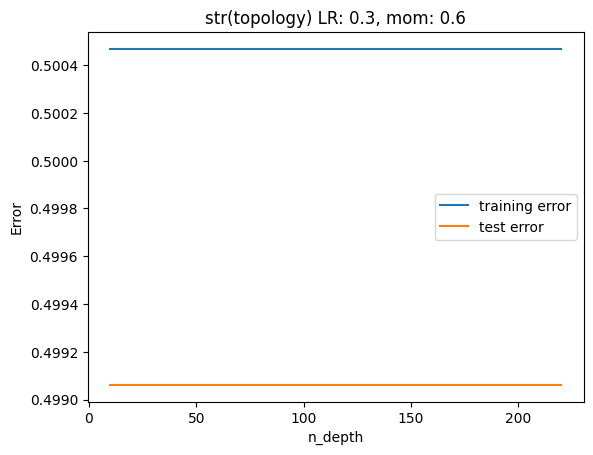

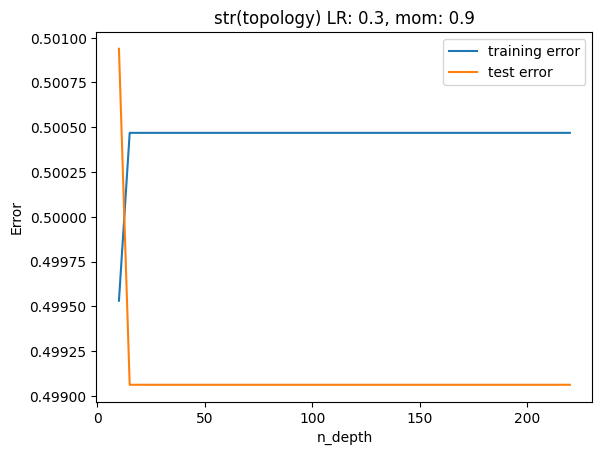

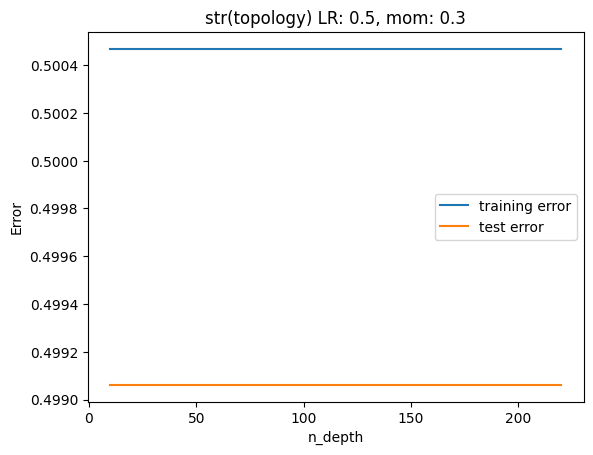

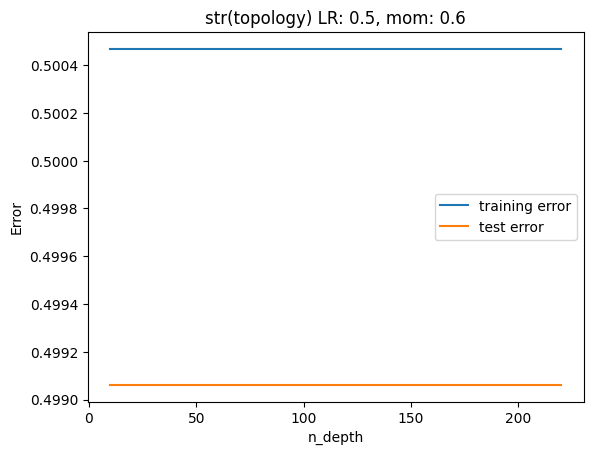

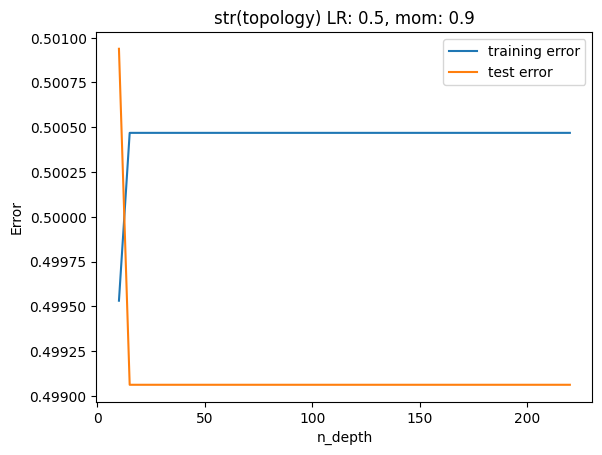

In [10]:
last_expermient_no = 0 # Número del último experimento conducido

# se probaron estas topologías inicialmente: [[8], [8,8,8], [8, 8, 8, 8]]
# Epochs ideal 185
epochs = range(10, 225, 5) # añado un pequeño margen para comprobar que si se entra en overfitting

learning_rate_range = range(1,7,2)
momentum_range = range(3,11,3)

for _lr in learning_rate_range:
    lr = _lr / 10.0
    for _momentum in momentum_range:
        best_acc = -1
        momentum = _momentum / 10.0 if _momentum != 0 else 0
        print(f"================LR: {lr} mom={momentum}=======================")
        training_accuracy = []
        test_accuracy = []
        training_error = []
        test_error = []
        for epoch in epochs:
            clasificador = MLPClassifier(solver='sgd', 
                        hidden_layer_sizes=[8,8,8],
                        max_iter = epoch,
                        random_state=98041,
                        learning_rate_init=lr,
                        momentum=momentum
                        )
            #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
            train_attribute_values = training_set_2[attributes]
            train_class_values = training_set_2[class_attribute]
            test_attribute_values = test_set_2[attributes]
            test_class_values = test_set_2[class_attribute]
            ################## Modelo ###########################
            model = clasificador.fit(train_attribute_values, train_class_values)
            ################## Clasificar  #################
            predict = model.predict(test_attribute_values)
            ############ Evaluar ###############################
            report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
            report = classification_report(test_class_values, predict, labels=class_attribute_name)
            training_accuracy.append(clasificador.score(train_attribute_values, train_class_values))
            if training_accuracy[-1] > best_acc:
                print(f"New best acc: {training_accuracy[-1]} with {epoch} epochs")
                best_acc = training_accuracy[-1]

            training_error.append(1.0 - clasificador.score(train_attribute_values, train_class_values))
            test_accuracy.append(clasificador.score(test_attribute_values, test_class_values))
            test_error.append(1.0 - clasificador.score(test_attribute_values, test_class_values))
            # print(f"acc={report_dict['accuracy']}")
        plt.figure()
        title = f"str(topology) LR: {lr}, mom: {momentum}"
        plt.title(title)
        plt.plot(epochs, training_error, label="training error")
        plt.plot(epochs, test_error, label="test error")
        plt.ylabel("Error")
        plt.xlabel("n_depth")
        plt.legend()

## Parámetros escogidos

Después de experimentar, los parámetros que me dieron mejores resultados fueron:

- solver = 'lbfgs'
- topología = [8, 8, 8]
- épocas = 350
- learning rate = N/A
- momentum = N/A


In [11]:
clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=[8,8,8],
                    max_iter = 350,
                    random_state=98041,
)
#A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
train_attribute_values = training_set_2[attributes]
train_class_values = training_set_2[class_attribute]
test_attribute_values = test_set_2[attributes]
test_class_values = test_set_2[class_attribute]
################## Modelo ###########################
model = clasificador.fit(train_attribute_values, train_class_values)
################## Clasificar  #################
predict = model.predict(test_attribute_values)
############ Evaluar ###############################
report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
acc = report_dict["accuracy"]
report = classification_report(test_class_values, predict, labels=class_attribute_name)

print(f"accuracy exacto: {acc}")
print(report)

accuracy exacto: 0.8292682926829268
                 precision    recall  f1-score   support

tested_negative       0.85      0.80      0.82       267
tested_positive       0.81      0.86      0.83       266

       accuracy                           0.83       533
      macro avg       0.83      0.83      0.83       533
   weighted avg       0.83      0.83      0.83       533

